In [1]:
# наивная байесовская классификация

In [3]:
# набор моделей, которые предлагают быстрые и простые алгоритмы классификации
# 

In [5]:
#Гауссовский наивный байесовский классификатор
#ДОпущение состоит в том, что ! данные всех категорий взяы из простого нормаоьного распределения

In [27]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.naive_bayes import GaussianNB

In [9]:
iris = sns.load_dataset("iris")
print(iris.head())

   sepal_length  sepal_width  petal_length  petal_width species
0           5.1          3.5           1.4          0.2  setosa
1           4.9          3.0           1.4          0.2  setosa
2           4.7          3.2           1.3          0.2  setosa
3           4.6          3.1           1.5          0.2  setosa
4           5.0          3.6           1.4          0.2  setosa


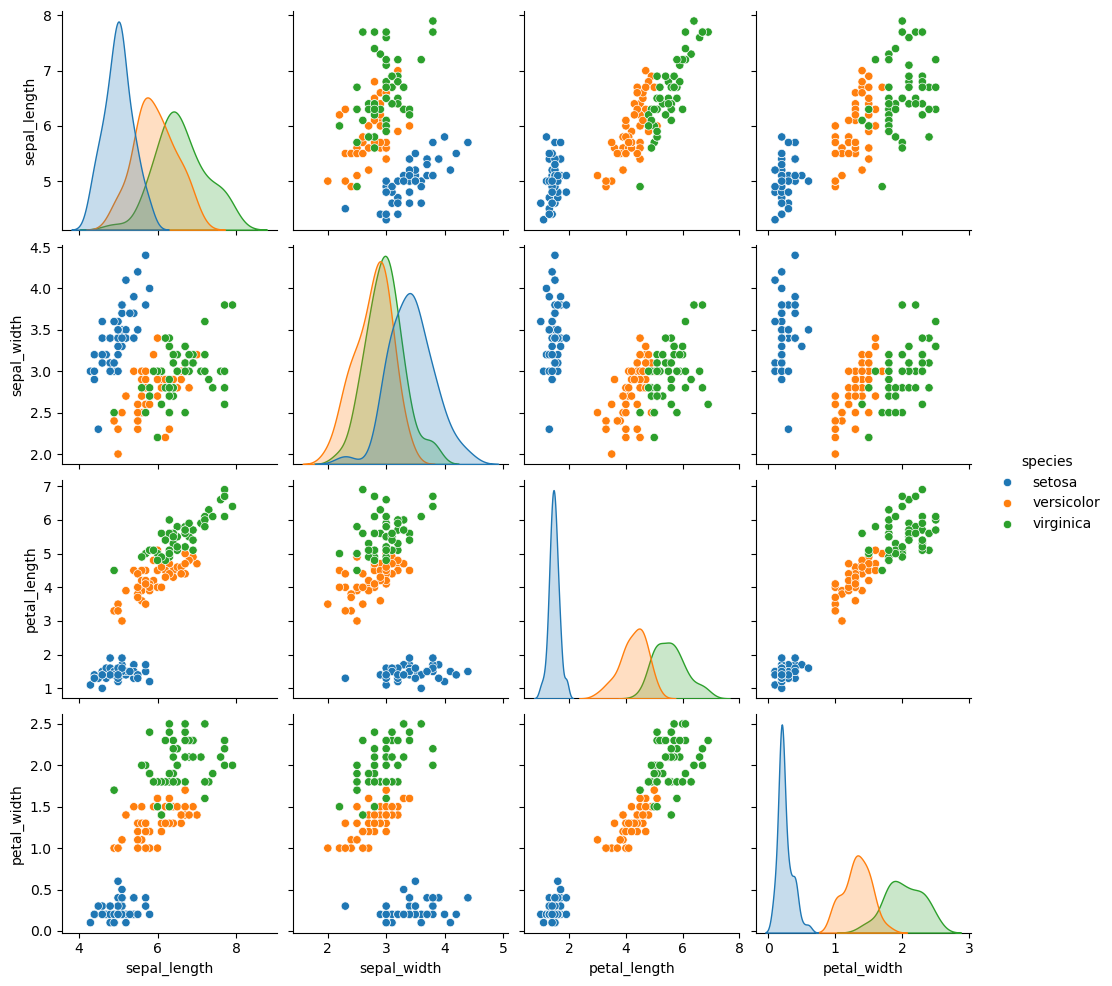

In [11]:
sns.pairplot(iris, hue="species")

plt.show()

In [13]:
data = iris[["sepal_length", "petal_length", "species"]]
print(data.head())

   sepal_length  petal_length species
0           5.1           1.4  setosa
1           4.9           1.4  setosa
2           4.7           1.3  setosa
3           4.6           1.5  setosa
4           5.0           1.4  setosa


(100, 3)
[5.006 1.462]
[0.121764 0.029556]
[5.936 4.26 ]
[0.261104 0.2164  ]
   sepal_length  petal_length
0      4.300000           1.0
1      4.327273           1.0
2      4.354545           1.0
3      4.381818           1.0
4      4.409091           1.0


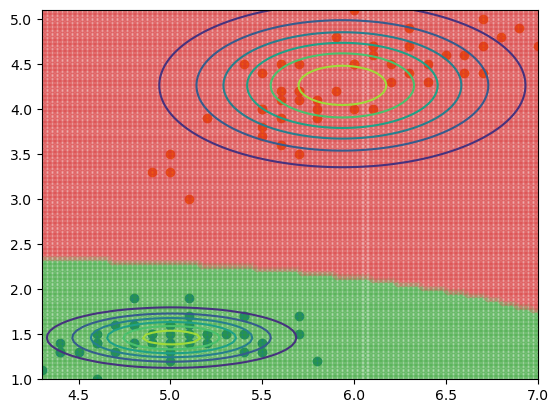

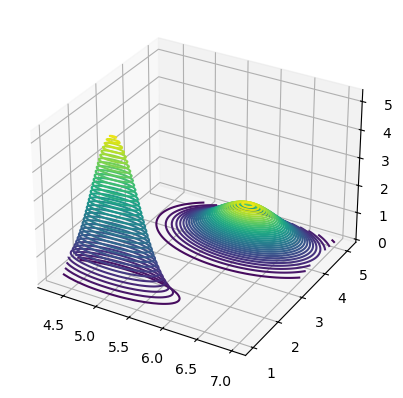

In [67]:
# setosa versicolor
data_df = data[(data["species"] == "setosa")| (data["species"] == "versicolor")]
print (data_df.shape)



X = data_df[["sepal_length", "petal_length"]]
y = data_df["species"]

model = GaussianNB()
model.fit(X,y)

print(model.theta_[0])
print(model.var_[0])
print(model.theta_[1])
print(model.var_[1])

theta0 = model.theta_[0]
var0 = model.var_[0]
theta1 = model.theta_[1]
var1 = model.var_[1]


data_df_seposa = data_df[data_df["species"] == "setosa"]
data_df_versicolor = data_df[data_df["species"] == "versicolor"]

plt.scatter(data_df_seposa["sepal_length"], data_df_seposa["petal_length"])
plt.scatter(data_df_versicolor["sepal_length"], data_df_versicolor["petal_length"])

x1_p = np.linspace(min(data_df["sepal_length"]), max(data_df["sepal_length"]), 100)
x2_p = np.linspace(min(data_df["petal_length"]), max(data_df["petal_length"]), 100)

X1_p, X2_p = np.meshgrid(x1_p, x2_p)

X_p = pd.DataFrame(
    np.vstack([X1_p.ravel(), X2_p.ravel()]).T, columns=["sepal_length","petal_length"] 
)

print(X_p.head())

z1 = (
    1 
    / (1 * np.pi * (var0[0] * var0[1]) ** 0.5) 
    * np.exp(
        -0.5
        * ( (X1_p - theta0[0]) ** 2 / (var0[0]) + (X2_p - theta0[1]) ** 2 / (var0[1]) ) 
    )
)

plt.contour(X1_p, X2_p,z1)


z2 = (
    1 
    / (1 * np.pi * (var1[0] * var1[1]) ** 0.5) 
    * np.exp(
        -0.5
        * ( (X1_p - theta1[0]) ** 2 / (var1[0]) + (X2_p - theta1[1]) ** 2 / (var1[1]) ) 
    )
)
plt.contour(X1_p, X2_p,z2)

y_p = model.predict(X_p)

X_p["species"] = y_p

X_p_setosa = X_p[X_p["species"] == "setosa"]
X_p_versicolor = X_p[X_p["species"] == "versicolor"]

plt.scatter(X_p_setosa["sepal_length"], X_p_setosa["petal_length"], alpha=0.2)
plt.scatter(X_p_versicolor["sepal_length"], X_p_versicolor["petal_length"], alpha=0.2)



#sns.pairplot(data_df, hue="species")

fig = plt.figure()

ax = plt.axes(projection="3d")
ax.contour3D(X1_p, X2_p,z1, 40)
ax.contour3D(X1_p, X2_p,z2, 40)


plt.show()


(100, 3)
[5.006 1.462]
[0.121764 0.029556]
[6.588 5.552]
[0.396256 0.298496]
   sepal_length  petal_length
0      4.300000           1.0
1      4.336364           1.0
2      4.372727           1.0
3      4.409091           1.0
4      4.445455           1.0


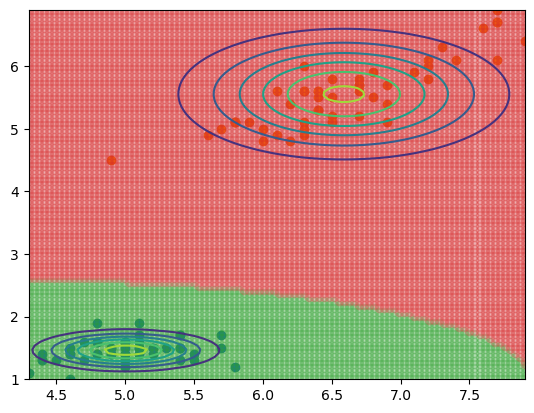

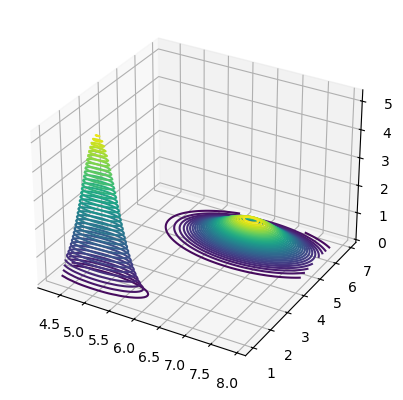

In [71]:
#setosa virginica
data_df = data[(data["species"] == "setosa")| (data["species"] == "virginica")]
print (data_df.shape)



X = data_df[["sepal_length", "petal_length"]]
y = data_df["species"]

model = GaussianNB()
model.fit(X,y)

print(model.theta_[0])
print(model.var_[0])
print(model.theta_[1])
print(model.var_[1])

theta0 = model.theta_[0]
var0 = model.var_[0]
theta1 = model.theta_[1]
var1 = model.var_[1]


data_df_seposa = data_df[data_df["species"] == "setosa"]
data_df_versicolor = data_df[data_df["species"] == "virginica"]

plt.scatter(data_df_seposa["sepal_length"], data_df_seposa["petal_length"])
plt.scatter(data_df_versicolor["sepal_length"], data_df_versicolor["petal_length"])

x1_p = np.linspace(min(data_df["sepal_length"]), max(data_df["sepal_length"]), 100)
x2_p = np.linspace(min(data_df["petal_length"]), max(data_df["petal_length"]), 100)

X1_p, X2_p = np.meshgrid(x1_p, x2_p)

X_p = pd.DataFrame(
    np.vstack([X1_p.ravel(), X2_p.ravel()]).T, columns=["sepal_length","petal_length"] 
)

print(X_p.head())

z1 = (
    1 
    / (1 * np.pi * (var0[0] * var0[1]) ** 0.5) 
    * np.exp(
        -0.5
        * ( (X1_p - theta0[0]) ** 2 / (var0[0]) + (X2_p - theta0[1]) ** 2 / (var0[1]) ) 
    )
)

plt.contour(X1_p, X2_p,z1)


z2 = (
    1 
    / (1 * np.pi * (var1[0] * var1[1]) ** 0.5) 
    * np.exp(
        -0.5
        * ( (X1_p - theta1[0]) ** 2 / (var1[0]) + (X2_p - theta1[1]) ** 2 / (var1[1]) ) 
    )
)
plt.contour(X1_p, X2_p,z2)

y_p = model.predict(X_p)

X_p["species"] = y_p

X_p_setosa = X_p[X_p["species"] == "setosa"]
X_p_versicolor = X_p[X_p["species"] == "virginica"]

plt.scatter(X_p_setosa["sepal_length"], X_p_setosa["petal_length"], alpha=0.2)
plt.scatter(X_p_versicolor["sepal_length"], X_p_versicolor["petal_length"], alpha=0.2)



#sns.pairplot(data_df, hue="species")

fig = plt.figure()

ax = plt.axes(projection="3d")
ax.contour3D(X1_p, X2_p,z1, 40)
ax.contour3D(X1_p, X2_p,z2, 40)


plt.show()